In [1]:
# 나눔고딕 폰트 설치 및 설정
!apt-get update -qq
!apt-get install fonts-nanum -qq
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped dire

In [4]:
# 1. 데이터 로드 및 전처리
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

# 폰트 설정
import matplotlib.font_manager as fm
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=10)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False


----- 데이터프레임 기본 정보 -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

----- 결측치 개수 -----
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabi

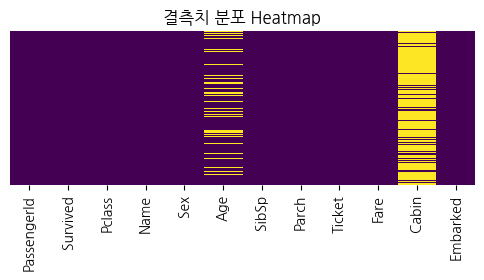

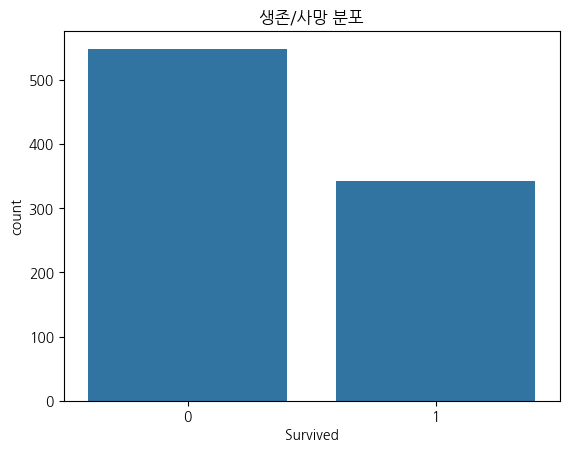

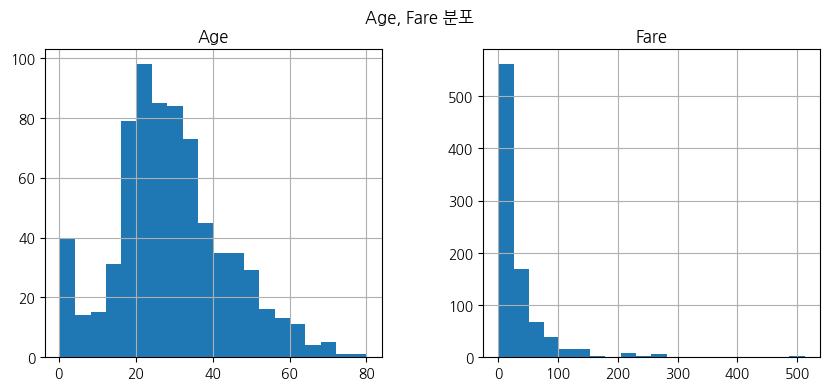

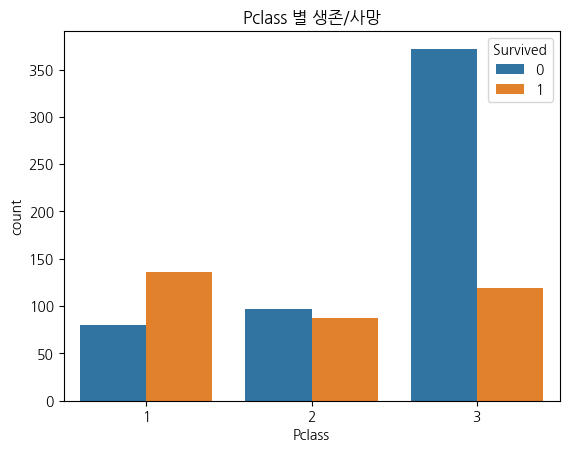

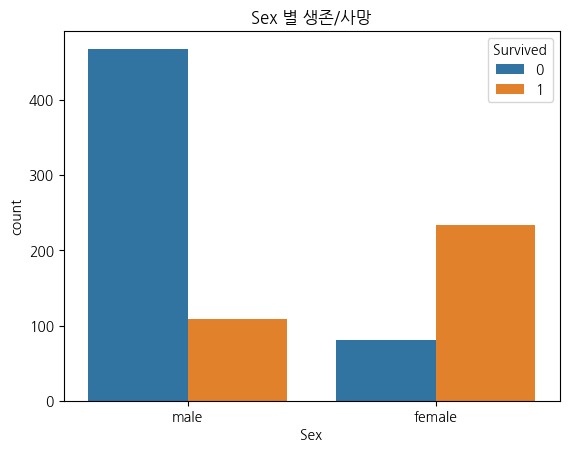

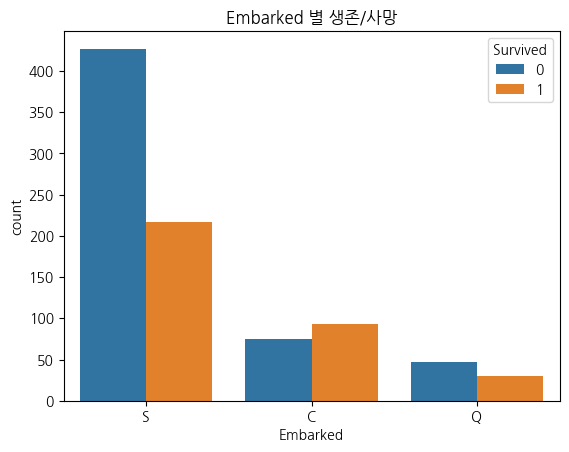

<Figure size 800x600 with 0 Axes>

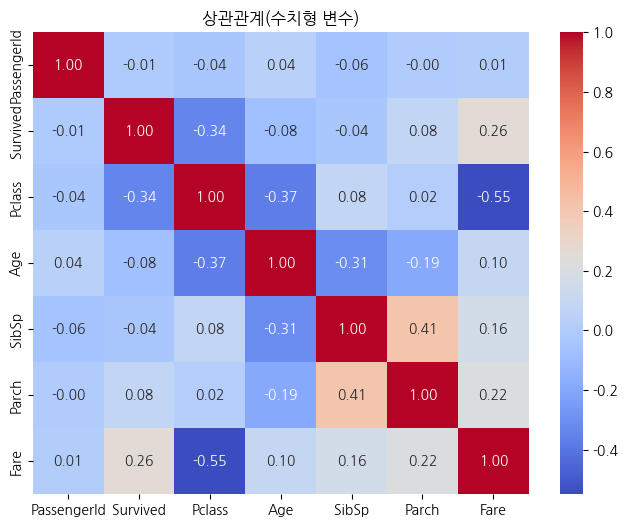

/tmp/ipython-input-10-3390827629.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].mean())
/tmp/ipython-input-10-3390827629.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].mode()[0])
/tmp/ipython-input-10-3390827629.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

Epoch 1: Loss=0.5331, Acc=0.754
Epoch 10: Loss=0.3833, Acc=0.844
Epoch 20: Loss=0.3376, Acc=0.850
Epoch 30: Loss=0.3106, Acc=0.869
Epoch 40: Loss=0.3248, Acc=0.861
Epoch 50: Loss=0.2829, Acc=0.881
Epoch 60: Loss=0.2888, Acc=0.879
Epoch 70: Loss=0.2711, Acc=0.886
Epoch 80: Loss=0.3734, Acc=0.883
Epoch 90: Loss=0.2726, Acc=0.881


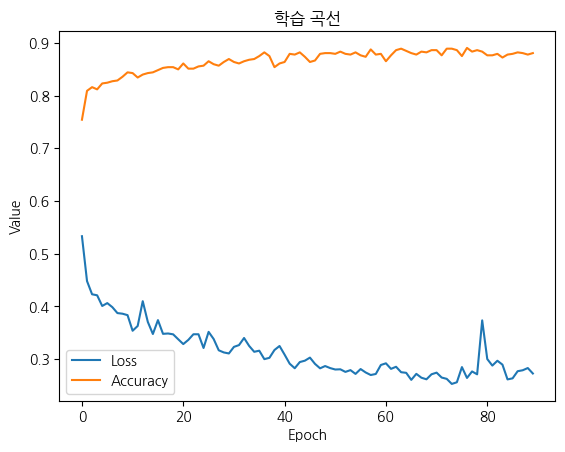

테스트셋 정확도: 0.827
              precision    recall  f1-score   support

           0      0.843     0.867     0.854       105
           1      0.803     0.770     0.786        74

    accuracy                          0.827       179
   macro avg      0.823     0.818     0.820       179
weighted avg      0.826     0.827     0.826       179



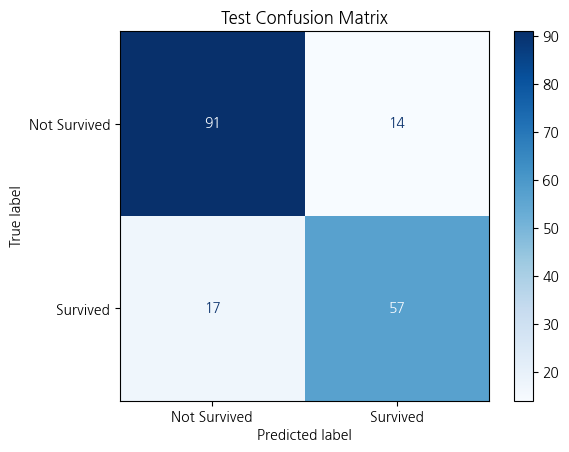

In [10]:


# 데이터 다운로드
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# ----- EDA -----
print("----- 데이터프레임 기본 정보 -----")
print(df.info())
print("\n----- 결측치 개수 -----")
print(df.isnull().sum())
print("\n----- 데이터 요약(수치형) -----")
print(df.describe())
print("\n----- Survived 값 분포 -----")
print(df['Survived'].value_counts())

# 결측치 시각화
plt.figure(figsize=(6,2))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("결측치 분포 Heatmap")
plt.show()

# Survived(생존) 분포 시각화
sns.countplot(x='Survived', data=df)
plt.title("생존/사망 분포")
plt.show()

# 수치형 변수 분포(히스토그램)
df[['Age','Fare']].hist(figsize=(10,4), bins=20)
plt.suptitle("Age, Fare 분포")
plt.show()

# 범주형 변수 분포
for col in ['Pclass','Sex','Embarked']:
    sns.countplot(x=col, data=df, hue='Survived')
    plt.title(f"{col} 별 생존/사망")
    plt.show()

# 상관관계 히트맵
plt.figure(figsize=(8,6))
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("상관관계(수치형 변수)")

plt.show()

# ----- 데이터 전처리 -----
cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target_col = 'Survived'
df = df[cols + [target_col]]

# === 결측치 처리 ===
# 수치형: 평균값으로 대체
for col in ['Age', 'Fare']:
    df[col] = df[col].fillna(df[col].mean())
# 범주형: 최빈값으로 대체
for col in ['Sex', 'Embarked']:
    df[col] = df[col].fillna(df[col].mode()[0])

# 범주형 인코딩
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])      # male:1, female:0
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

# 데이터 분리 및 정규화
X = df[cols].values.astype(np.float32)
y = df[target_col].values.astype(np.int64)

# 수치형 컬럼 정규화 (Pclass(0), Age(2), SibSp(3), Parch(4), Fare(5))
scaler = StandardScaler()
num_idx = [0,2,3,4,5]
X[:,num_idx] = scaler.fit_transform(X[:,num_idx])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----- PyTorch Dataset -----
class TitanicDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.long)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_ds = TitanicDataset(X_train, y_train)
test_ds = TitanicDataset(X_test, y_test)
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
test_loader = DataLoader(test_ds, batch_size=32, shuffle=False)

# ----- MLP 모델 정의 -----
class TitanicMLP(nn.Module):
    def __init__(self, in_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 2)  # 이진분류 (softmax)
        )
    def forward(self, x):
        return self.net(x)

model = TitanicMLP(X.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
criterion = nn.CrossEntropyLoss()

# ----- 학습 -----
losses, accs = [], []
epochs = 90
for epoch in range(epochs):
    model.train()
    total_loss, correct, total = 0, 0, 0
    for xb, yb in train_loader:
        pred = model(xb)
        loss = criterion(pred, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        correct += (torch.argmax(pred,1)==yb).sum().item()
        total += yb.size(0)
    acc = correct/total
    losses.append(total_loss/len(train_loader))
    accs.append(acc)
    if (epoch+1)%10==0 or epoch==0:
        print(f"Epoch {epoch+1}: Loss={losses[-1]:.4f}, Acc={acc:.3f}")

# ----- 학습 곡선 -----
plt.plot(losses, label="Loss")
plt.plot(accs, label="Accuracy")
plt.title("학습 곡선")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.legend()
plt.show()

# ----- 테스트셋 평가 -----
model.eval()
with torch.no_grad():
    all_pred = []
    all_true = []
    for xb, yb in test_loader:
        pred = model(xb)
        pred_label = torch.argmax(pred,1)
        all_pred.extend(pred_label.cpu().numpy())
        all_true.extend(yb.cpu().numpy())
    all_pred = np.array(all_pred)
    all_true = np.array(all_true)
    test_acc = (all_pred==all_true).mean()
    print(f"테스트셋 정확도: {test_acc:.3f}")

# ----- 평가지표/혼동행렬 -----
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print(classification_report(all_true, all_pred, digits=3))
cm = confusion_matrix(all_true, all_pred)
ConfusionMatrixDisplay(cm, display_labels=["Not Survived","Survived"]).plot(cmap='Blues')
plt.title("Test Confusion Matrix")
plt.show()
